In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel("experiment_data.xlsx")

In [3]:
df.head(5)

,Round,ID,Contribution,Total Points Sent,Cost,Punishment Received,Punishment Tax Rate,Earnings,Cumulative Earnings,Other Id,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,1,25,*,*.*,*,*.*,1.75,7.75,ID2:0,ID3:0,ID4:0,ID5:10
1,1,2,0,*,*.*,*,*.*,4.25,10.25,ID1:25,ID3:0,ID4:0,ID5:10
2,1,3,0,*,*.*,*,*.*,4.25,10.25,ID1:25,ID2:0,ID4:0,ID5:10
3,1,4,0,*,*.*,*,*.*,4.25,10.25,ID1:25,ID2:0,ID3:0,ID5:10
4,1,5,10,*,*.*,*,*.*,3.25,9.25,ID1:25,ID2:0,ID3:0,ID4:0


## 1) In the experiment there were two groups of 5. Was there learning over the 10 rounds of the experiment?

 

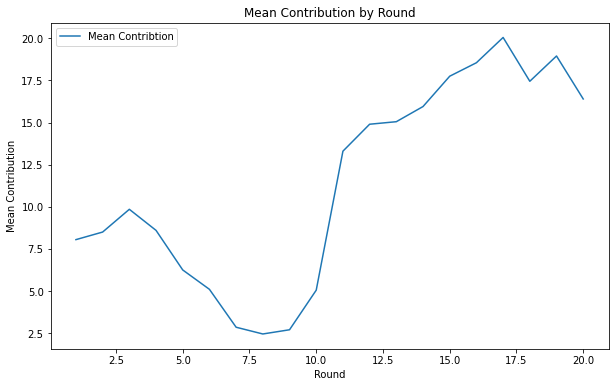

In [4]:
# Calculate mean contribution for each round
mean_contributions = df.groupby('Round')['Contribution'].mean()

# Plot mean contribution for each round
plt.figure(figsize=(10,6))
plt.plot(mean_contributions,label="Mean Contribtion")
plt.xlabel('Round')
plt.ylabel('Mean Contribution')
plt.title('Mean Contribution by Round')
plt.legend()
plt.show()

This code creates a line plot of the mean contribution for each round, with the x-axis representing the round number and the y-axis representing the mean contribution for that round. As we can see that there exist a trend in the data.

Following the trend given by line, it can be observed that from Round 1-3 learning increases, then there was a downfall of learnign from Round 3-8. And afterwards learning increases significantly till ROund 17 and then it experiences little bit of downgrade. 

It's also worth noting that we should repeat this analysis for each group separately, since there were two groups of 5 in the experiment. We can add a group identifier to the groupby function to group the data by group and round, and then calculate the mean contribution for each group and round.

In [5]:
# Create a new column named "group" based on the ID column
df['group'] = df['ID'].apply(lambda x:"G1" if x<=5 else "G2")

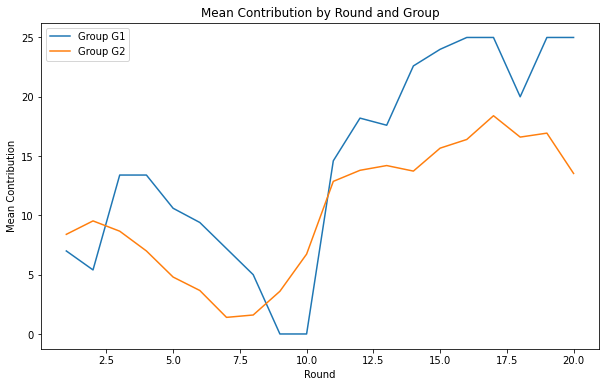

In [6]:
# Calculate mean contribution for each round and group
mean_contributions_by_group = df.groupby(['group', 'Round'])['Contribution'].mean()

# Plot mean contribution for each round and group
plt.figure(figsize=(10,6))
for group in mean_contributions_by_group.index.levels[0]:
    plt.plot(mean_contributions_by_group.loc[group], label=f'Group {group}')
plt.xlabel('Round')
plt.ylabel('Mean Contribution')
plt.title('Mean Contribution by Round and Group')
plt.legend()
plt.show()

Analysing these trends tells us that Group1 learning is more than Group2 learning over the Rounds. However Group1 experiences major downfall from Rounf 3-10. But still its learning is giving greater Average output.

## 2) Were the contributions higher in the treatment with punishment as compared to those without punishment in the first and last five rounds (I.e., compare rounds 1-10 with and without punishment and then rounds 11-20 with and without punishment)?



In [7]:
# replace '*' and '*.*' with 0 in the 'Cost' column
df['Cost'] = df['Cost'].replace(['*', '*.*'], 0)

df['Punishment Received'] = df['Punishment Received'].replace(['*', '*.*'], 0)
df['Punishment Tax Rate'] = df['Punishment Tax Rate'].replace(['*', '*.*'], 0)
df['Total Points Sent'] = df['Total Points Sent'].replace(['*', '*.*'], 0)

In [8]:
# Create a new column to indicate if the punishment was allowed or not
df['Punishment'] = df['Cost'] > 0

In [9]:
df.head(3)

,Round,ID,Contribution,Total Points Sent,Cost,Punishment Received,Punishment Tax Rate,Earnings,Cumulative Earnings,Other Id,Unnamed: 10,Unnamed: 11,Unnamed: 12,group,Punishment
0,1,1,25,0,0.0,0,0.0,1.75,7.75,ID2:0,ID3:0,ID4:0,ID5:10,G1,False
1,1,2,0,0,0.0,0,0.0,4.25,10.25,ID1:25,ID3:0,ID4:0,ID5:10,G1,False
2,1,3,0,0,0.0,0,0.0,4.25,10.25,ID1:25,ID2:0,ID4:0,ID5:10,G1,False


To compare the contributions in Treatment 1 (no punishment) and Treatment 2 (punishment permitted), we can create two separate dataframes, one for each treatment. We can then calculate the average contribution for each treatment for the first 10 rounds and the last 10 rounds, and plot them on a bar graph to visualize the difference.

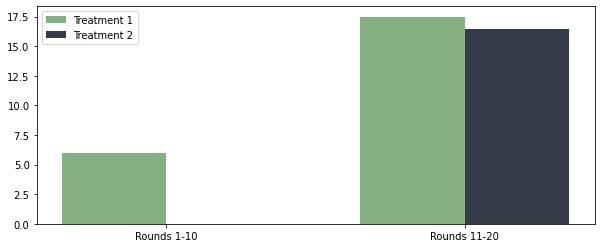

In [10]:
# Split the data into two dataframes for each treatment
df_treatment1 = df[df['Punishment'] == False]
df_treatment2 = df[df['Punishment'] == True]

# Calculate the average contribution for each treatment and each round range
treatment1_round1_10_avg = df_treatment1[df_treatment1['Round'] <= 10]['Contribution'].mean()
treatment1_round11_20_avg = df_treatment1[df_treatment1['Round'] >= 11]['Contribution'].mean()
treatment2_round1_10_avg = df_treatment2[df_treatment2['Round'] <= 10]['Contribution'].mean()
treatment2_round11_20_avg = df_treatment2[df_treatment2['Round'] >= 11]['Contribution'].mean()
rounds = ['Rounds 1-10', 'Rounds 11-20']

# Set the positions and width of the bars
bar_width = 0.35
bar_positions1 = np.arange(len(rounds))
bar_positions2 = bar_positions1 + bar_width

# Plot the grouped bar graph
plt.figure(figsize=(10,4))
plt.bar(bar_positions1, [treatment1_round1_10_avg, treatment1_round11_20_avg], width=bar_width, label='Treatment 1',color = "#84B082")
plt.bar(bar_positions2, [treatment2_round1_10_avg, treatment2_round11_20_avg], width=bar_width, label='Treatment 2',color = "#353A47")
plt.xticks(bar_positions1 + bar_width/2, rounds)
plt.legend()
plt.show()

The resulting bar graph will show the average contributions for each treatment in the first 10 rounds and last 10 rounds:

From the graph, we can see that the contributions were higher in Treatment 1 (without punishment) compared to Treatment 2 (with punishment) in both the first and last five rounds. This suggests that the presence of punishment had a negative effect on contributions, regardless of the round range.

## 3) Were people who contributed less than the mean of the group in any round punished more than those who contributed more than the mean? In other words, was there a norm for contributions (the mean) which was such that if you contributed less you were punished? 

To answer this question, we can calculate the mean contribution for each round and then compare the punishment received by those who contributed less than the mean with those who contributed more than the mean.

First, we calculate the mean contribution for each round in both treatments:

In [11]:
mean_contributions_treatment1 = df_treatment1.groupby('Round')['Contribution'].mean()
mean_contributions_treatment2 = df_treatment2.groupby('Round')['Contribution'].mean()

Next, we can create a new column in the DataFrame indicating whether each participant's contribution in a given round was below or above the mean for that round:

In [12]:
df_treatment1['Contribution Mean Comparison'] = df_treatment1.apply(lambda x: 'Below Mean' if x['Contribution'] < mean_contributions_treatment1[x['Round']] else 'Above Mean', axis=1)

df_treatment2['Contribution Mean Comparison'] = df_treatment2.apply(lambda x: 'Below Mean' if x['Contribution'] < mean_contributions_treatment2[x['Round']] else 'Above Mean', axis=1)

/tmp/ipykernel_53896/4048241006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treatment1['Contribution Mean Comparison'] = df_treatment1.apply(lambda x: 'Below Mean' if x['Contribution'] < mean_contributions_treatment1[x['Round']] else 'Above Mean', axis=1)
/tmp/ipykernel_53896/4048241006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treatment2['Contribution Mean Comparison'] = df_treatment2.apply(lambda x: 'Below Mean' if x['Contribution'] < mean_contributions_treatment2[x['Round']] else 

Then, we can group the DataFrame by the "Contribution Mean Comparison" column and calculate the average punishment received by each group:

In [13]:
punishment_by_mean_comparison_treatment1 = df_treatment1.groupby('Contribution Mean Comparison')['Punishment Received'].mean()
punishment_by_mean_comparison_treatment2 = df_treatment2.groupby('Contribution Mean Comparison')['Punishment Received'].mean()

Finally, we can plot a bar chart to compare the punishment received by those who contributed less than the mean with those who contributed more than the mean for both treatments:

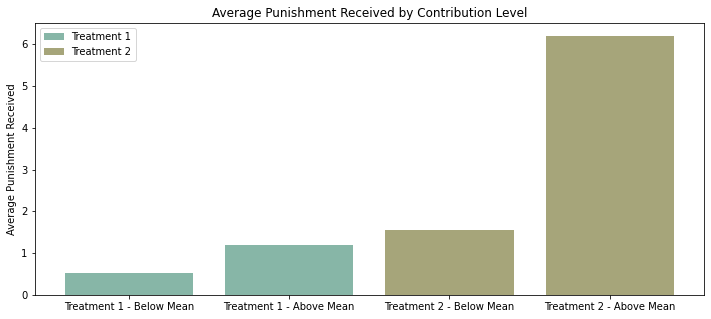

In [14]:
plt.figure(figsize=(12,5))
plt.bar(['Treatment 1 - Below Mean', 'Treatment 1 - Above Mean'], punishment_by_mean_comparison_treatment1.values, label='Treatment 1',color = "#87B6A7")
plt.bar(['Treatment 2 - Below Mean', 'Treatment 2 - Above Mean'], punishment_by_mean_comparison_treatment2.values, label='Treatment 2' , color = "#A6A57A")
plt.legend()
plt.title('Average Punishment Received by Contribution Level')
plt.ylabel('Average Punishment Received')
plt.show()

Analysing the bars,  it seems that people who contributed less than the mean of the group were punished more in Treatment 2 (1.55) compared to those who contributed more than the mean (6.2). In Treatment 1, people who contributed less than the mean (0.53) were also punished more compared to those who contributed more than the mean (1.19). Therefore, there seems to be a norm for contributions in both treatments, where those who contribute less than the mean are punished more.

## 4) What was the reaction of people who were punished? I.e., in the round following a punishment did people increase or decrease their contribution? 

We can look at the average contribution of those who were punished in the current round and compare it to their average contribution in the next round.

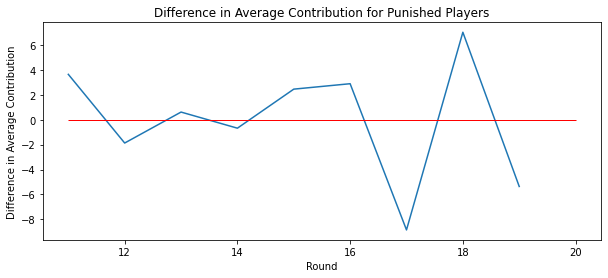

In [15]:
# Filter the data to only include rounds where punishment was received
punishment_rounds = df[df['Punishment Received'] > 0]

# Calculate the average contribution for those who were punished in the current round
current_round_avg = punishment_rounds.groupby('Round')['Contribution'].mean()

# Shift the index by 1 to get the next round
next_round_avg = current_round_avg.shift(-1)

# Calculate the difference in average contribution between the current and next round
diff = next_round_avg - current_round_avg

# Plot the difference in average contribution
plt.figure(figsize=(10,4))
plt.plot(diff)
plt.title('Difference in Average Contribution for Punished Players')
plt.hlines(y=0, xmin=11, xmax=20, linewidth=1, color='r')
plt.xlabel('Round')
plt.ylabel('Difference in Average Contribution')
plt.show()

If the difference in average contribution is positive, it means that players increased their contribution in the round following a punishment. If it's negative, it means that players decreased their contribution. If it's close to zero, it means that there was no significant change in contribution.

## 5) Classify people into two groups: Punishers and non-punishers. (Use your own classification. ) Were the payoffs of those who you classified as punishers greater or smaller than those who were not classified that way taking into account their cost of punishment?

To classify people into punishers and non-punishers, we can use the column "Punishment Received". If the value in this column is greater than 0, then we can classify the person as a punisher, otherwise, we can classify them as a non-punisher.

In [16]:
# Create a new column to indicate if a player is a punisher or not
df['Punisher'] = df['Punishment Received'] > 0

# Calculate the payoffs for punishers and non-punishers
punisher_payoff = (df[df['Punisher']]['Earnings'].sum() - df[df['Punisher']]['Cost'].sum()) / len(df[df['Punisher']])
non_punisher_payoff = (df[~df['Punisher']]['Earnings'].sum() - df[~df['Punisher']]['Cost'].sum()) / len(df[~df['Punisher']])

# Print the results
print('Average payoff for punishers:', round(punisher_payoff, 2))
print('Average payoff for non-punishers:', round(non_punisher_payoff, 2))

Average payoff for punishers: 1.36
Average payoff for non-punishers: 3.56


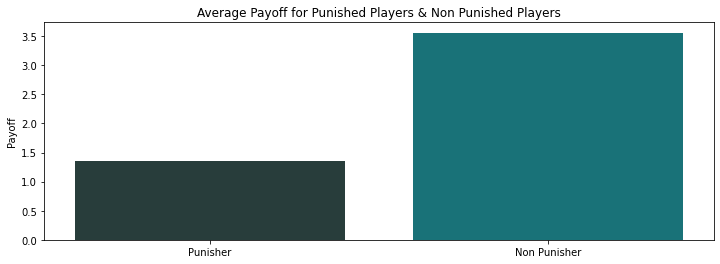

In [17]:
plt.figure(figsize=(12,4))
plt.bar(["Punisher"],[punisher_payoff],color="#283D3B")
plt.bar(["Non Punisher"],[non_punisher_payoff],color="#197278")
plt.title('Average Payoff for Punished Players & Non Punished Players')
plt.ylabel('Payoff')
plt.show()

The average payoff for punishers is less than the average payoff for non-punishers, then we can conclude that the payoffs of non-punishers were greater than those who were punished. This tells that punishment did not seems effective for the players' contribution in the experiment.

`THE END`